# ***House Price Predictions (Using Scikit Learn)***

## Imporing required Packages

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor

In [2]:
df = pd.read_csv("D:\Tacenda's files\Machine Learning Computations\Datasets\House_prices.csv")

In [3]:
df

,Unnamed: 0,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,3,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,12.247694
1,1,2,20,3,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,12.109011
2,2,3,60,3,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,12.317167
3,3,4,70,3,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,11.849398
4,4,5,60,3,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1453,1456,60,3,7917,1,3,3,0,4,...,0,0,0,0,0,8,2007,8,4,12.072541
1454,1454,1457,20,3,13175,1,3,3,0,4,...,0,0,0,0,0,2,2010,8,4,12.254863
1455,1455,1458,70,3,9042,1,3,3,0,4,...,0,0,0,0,2500,5,2010,8,4,12.493130
1456,1456,1459,20,3,9717,1,3,3,0,4,...,112,0,0,0,0,4,2010,8,4,11.864462


In [4]:
df.shape

(1458, 72)

In [5]:
# Looking for any missing values
df.isna().sum().sort_values(ascending = False).head(10)

Unnamed: 0      0
Id              0
Functional      0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
dtype: int64

In [6]:
# Removing unwanted columns
df.drop(df.columns[[0,1]], axis = 1, inplace = True)

In [7]:
# Checking for Duplicates
df.loc[df.duplicated()]

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [3]:
# for making the columns name to be in Lowercase
# data.columns = data.columns.str.lower()

## Plotting the Core features to understand the data

In [8]:
# Plotting some of the core values to know the relationship between them
X_train_core = df[['LotArea','SaleCondition','YearBuilt','FullBath','Functional','Neighborhood','Street','ScreenPorch','HouseStyle']]
Y_train_core = df.iloc[:,-1]

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'M

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


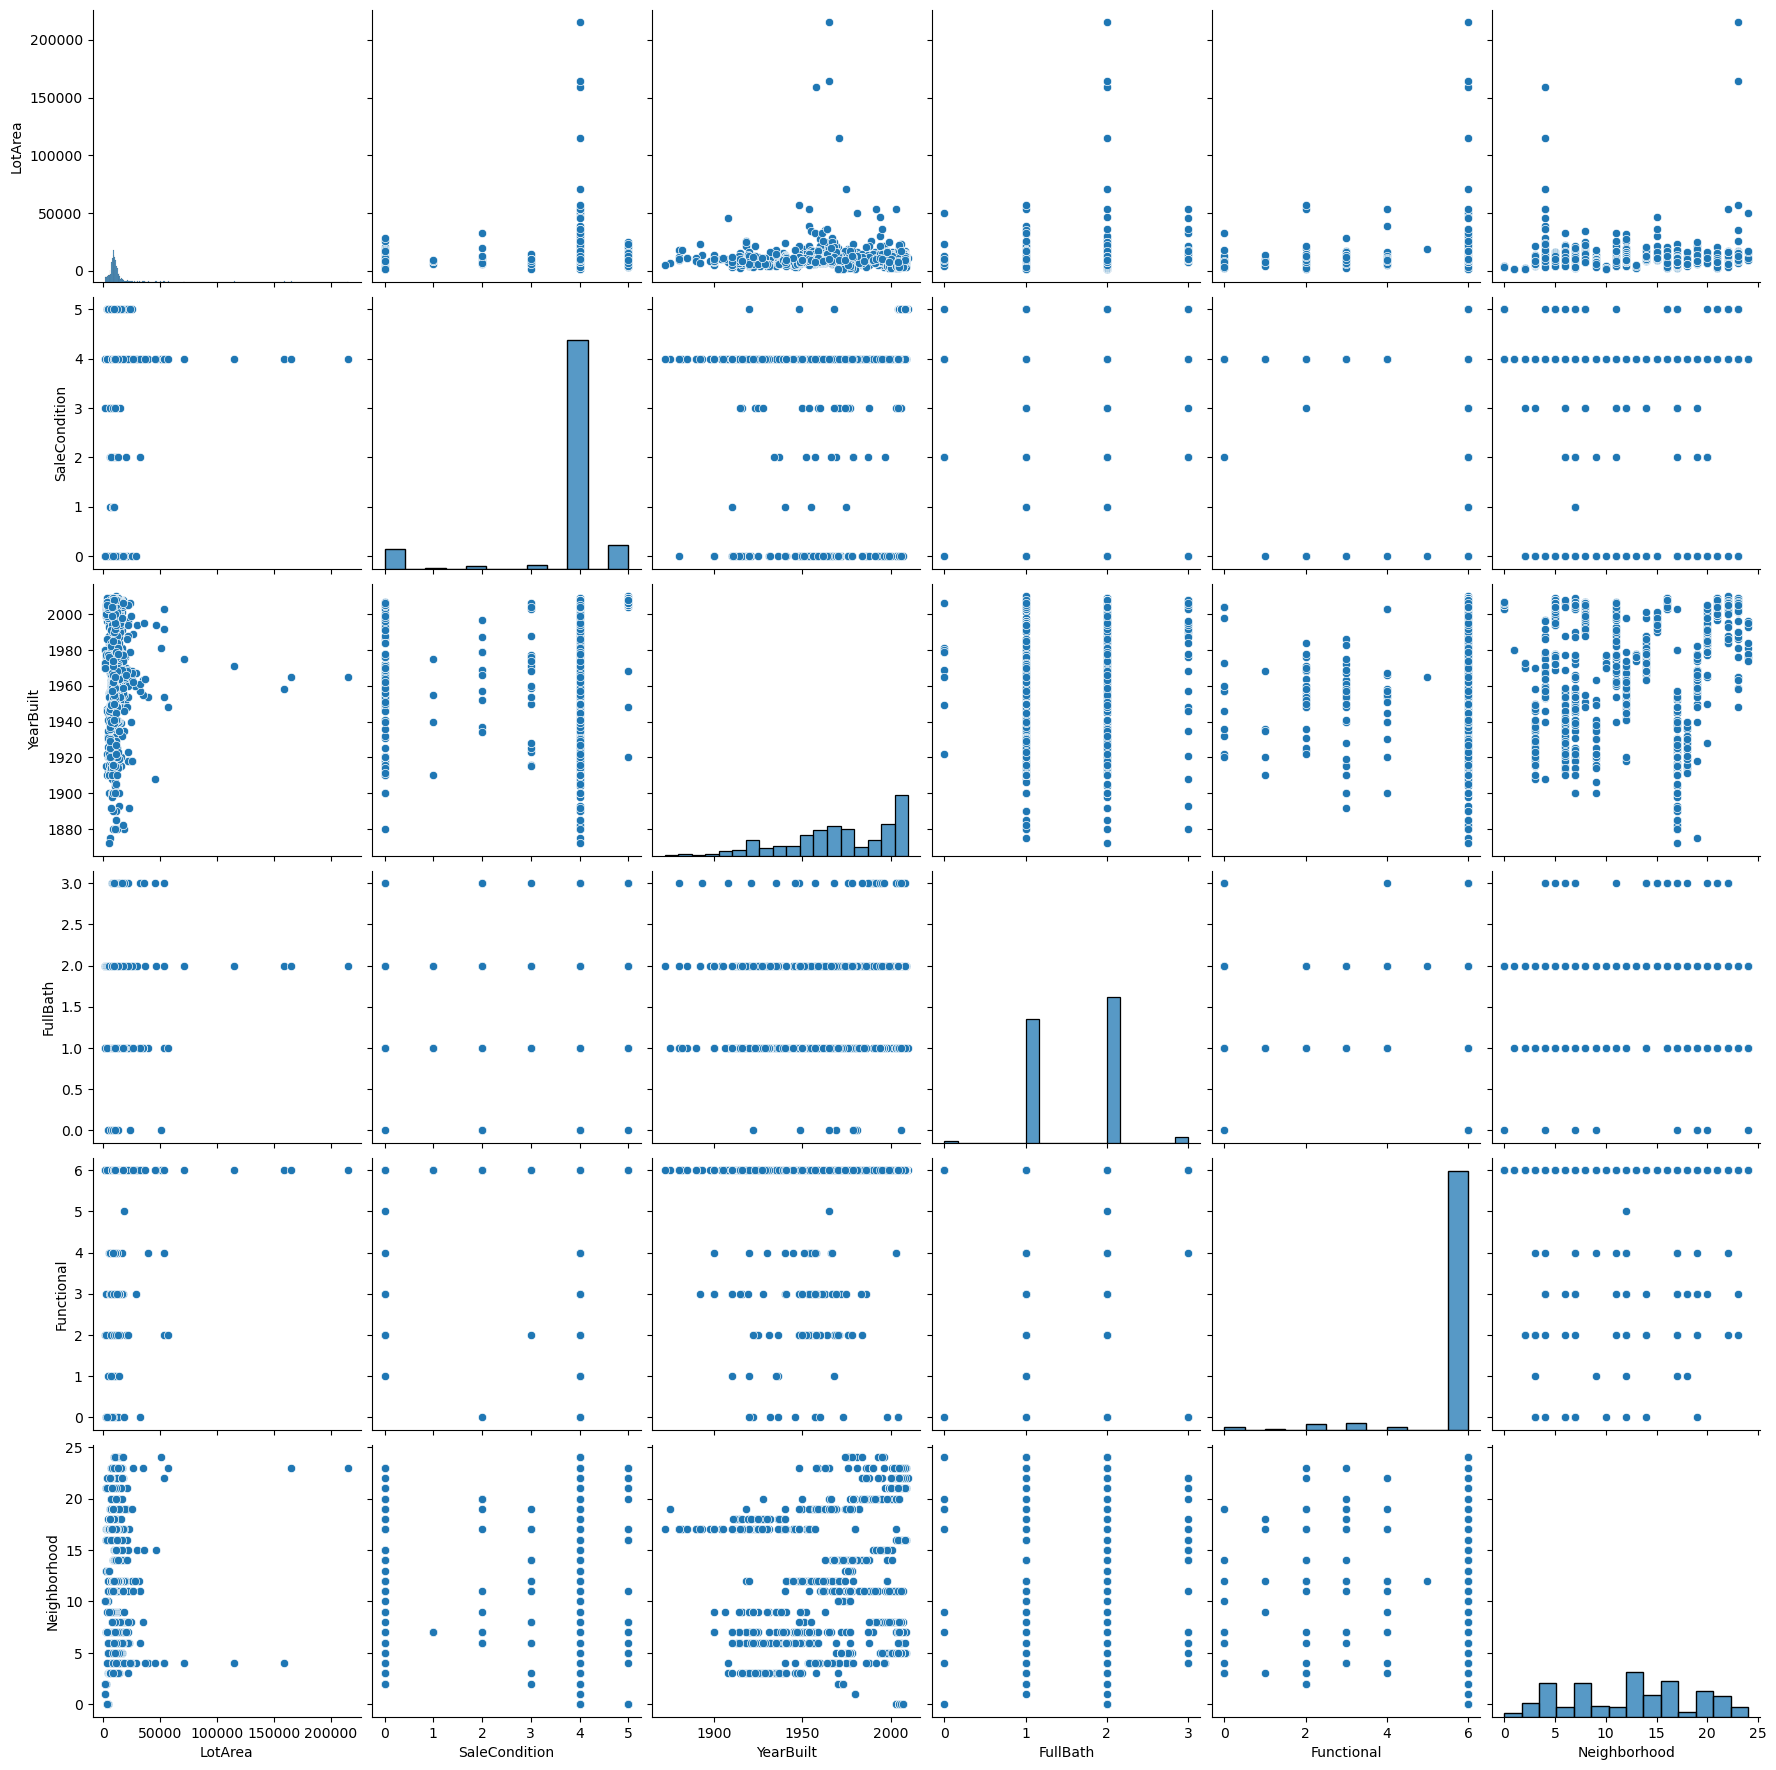

In [24]:
sns.pairplot(data = X_train_core, vars = ['LotArea', 'SaleCondition', 'YearBuilt', 'FullBath','Functional','Neighborhood'], height = 3.0)
plt.show()

In [25]:
df.Functional.value_counts()

Functional
6    1358
3      34
2      31
4      15
0      14
1       5
5       1
Name: count, dtype: int64

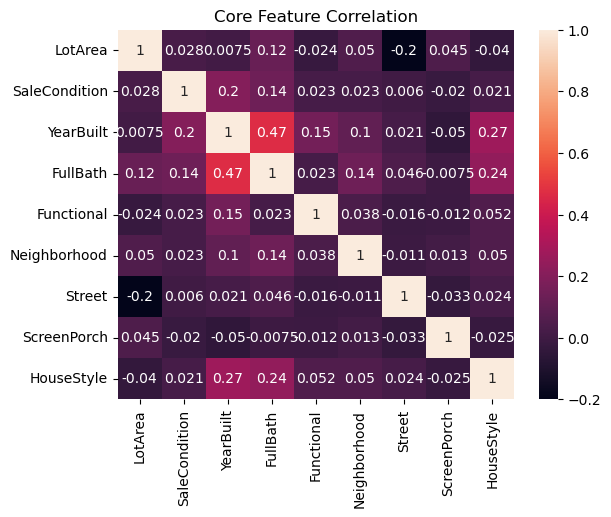

In [26]:
core_corr = X_train_core.corr()
sns.heatmap(core_corr, annot = True)
plt.title('Core Feature Correlation')
plt.show()

In [27]:
feature_title = ['LotArea', 'SaleCondition', 'YearBuilt', 'FullBath','Functional','Neighborhood']

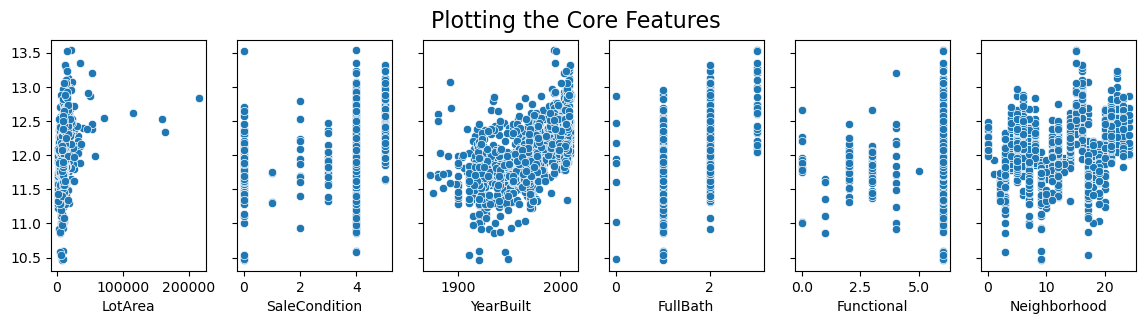

In [28]:
fig, ax = plt.subplots(1,6, figsize = (14,3), sharey = True)
for i in range(len(ax)):
    sns.scatterplot(x = X_train_core.iloc[:, i], y = Y_train_core.values.flatten(), ax = ax[i])
    ax[i].set_xlabel(feature_title[i])
plt.suptitle('Plotting the Core Features', fontsize = 16)
plt.show()

## Splitting the dataset

In [29]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 104)

In [31]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (1020, 69)
y_train shape: (1020,)
x_test shape: (438, 69)
y_test shape: (438,)


## Normalizing the dataset

In [2]:
# Note: Both X_train_norm and X_test_norm has to be 2-Dimensional array
Normalizer = StandardScaler()
X_train_norm = Normalizer.fit_transform(x_train)
X_test_norm = Normalizer.fit_transform(x_test)

## Creating and Fitting the model

In [33]:
SGDr = SGDRegressor(max_iter = 1000000, alpha = 0.000001)
model = SGDr.fit(X_train_norm, y_train)

In [34]:
print("Model's Accuracy:", model.score(X_train_norm, y_train))

Model's Accuracy: 0.9167088961333548


In [35]:
# Viewing parameters
print('Y-Intercept:',SGDr.intercept_)
print('Slope:',SGDr.coef_)
print('Alpha:',SGDr.alpha)
print('Maximm Iterations:',SGDr.max_iter)

Y-Intercept: [12.03427039]
Slope: [-0.03827792 -0.01938549  0.02093132  0.00490114 -0.00479379 -0.00229912
 -0.00323222 -0.00182033  0.00249779 -0.00165109  0.000848   -0.00300278
  0.01081947  0.01191677  0.08649639  0.03157972  0.01925887  0.03433873
  0.00234127  0.00490389 -0.01458464  0.01017143  0.00341713  0.00257142
  0.00152097  0.00293929  0.01401563 -0.01265608  0.00239235 -0.01074769
 -0.00504673  0.04131511  0.0077224   0.0163289   0.00612587  0.0560479
  0.00565365 -0.01310802  0.01239438 -0.00449316  0.03569554 -0.00309495
  0.09416381  0.00960451 -0.00262775  0.00014989  0.00069136  0.00612123
  0.00105962 -0.02127804  0.01732642  0.02454765 -0.00193376 -0.00325433
  0.04590756  0.00119638  0.00062166  0.00943304  0.01055059  0.00313909
 -0.00284148  0.00242125  0.00946731 -0.00188467 -0.00482848 -0.00348879
 -0.01348015 -0.00515043  0.0262584 ]
Alpha: 1e-06
Maximm Iterations: 1000000


In [36]:
y_pred = model.predict(X_test_norm)

In [37]:
print("Target Values:", y_test[104:110])
print("Predicted Values:", y_pred[104:110])

Target Values: [12.46458334 11.60732614 12.43987123 11.95761129 11.73206099 12.20055746]
Predicted Values: [12.45500839 11.56112589 12.42988623 12.03890564 11.68873148 12.14887875]


In [38]:
pred_corr = np.corrcoef(y_pred, y_test)

## How Target values and Predicted values are co-related

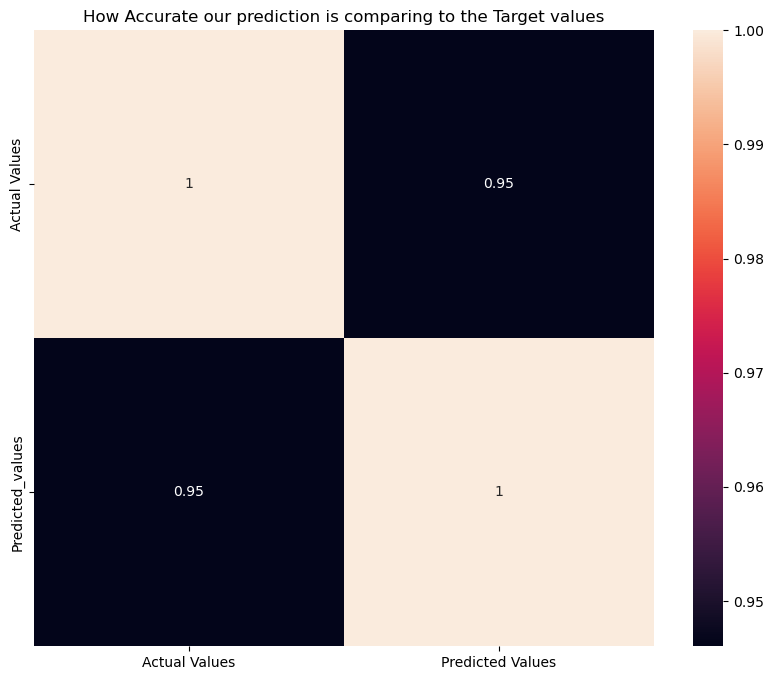

In [39]:
plt.figure(figsize = (10,8))
sns.heatmap(pred_corr, annot = True, xticklabels = ['Actual Values', 'Predicted Values'], yticklabels = ['Actual Values', 'Predicted_values'])
plt.title("How Accurate our prediction is comparing to the Target values")
plt.show()

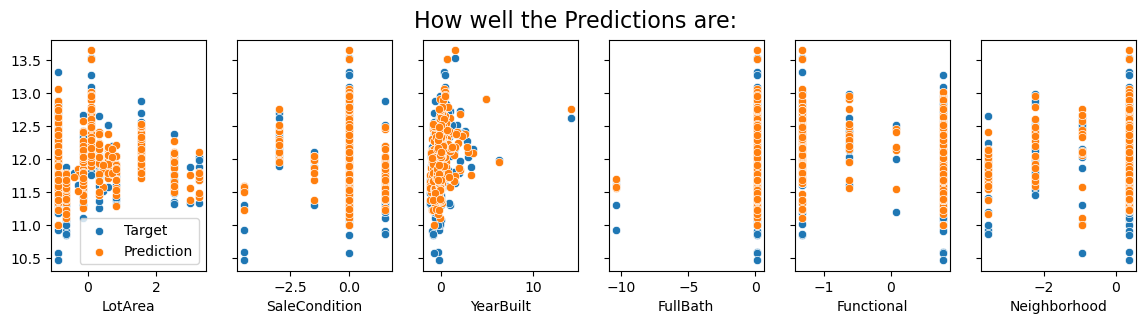

In [50]:
fig, ax = plt.subplots(1,6, figsize = (14,3), sharey = True)
for i in range(len(ax)):
    sns.scatterplot(x = X_test_norm[:, i], y = y_test.ravel(), ax = ax[i])
    ax[i].set_xlabel(feature_title[i])
    sns.scatterplot(x = X_test_norm[:,i], y = y_pred.ravel(), ax = ax[i])
plt.suptitle('How well the Predictions are:', fontsize = 16)
ax[0].legend(labels = ['Target', 'Prediction'])
plt.show()

In [44]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_pred, y_test)
print("Model's Accuracy:", 100 - (MSE*100), '%')
print("Mean Squared Error:", MSE*100, '%')

Model's Accuracy: 97.8894340995475 %
Mean Squared Error: 2.1105659004525057 %
